In [1]:
import nltk;
from nltk.corpus import stopwords;
stopwords = nltk.corpus.stopwords.words('english');
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wordLister(datafilePath):
    #open the file
    datafile = open(datafilePath);
    linesList = []
    numLines = 1000000;
    #read in each line
    for i in range(0,numLines):
        line = datafile.readline();
        linesList.append(line);
    #close file
    datafile.close();
    wordsList = []
    titleList = []
    #get all the words in all lines into one list
    for i in range(0,len(linesList)):
        titlesInLine = linesList[i].split();
        for title in titlesInLine:
            #replace underscores with spaces
            titleList.append(title.replace('_', ' '));
    for each in titleList:
        #split on whitespcae
        words = each.split();
        for word in words:
            #get rid of special characters
            word1 = ''.join(l for l in word if l.isalnum())
            wordsList.append(word1);
        
    return wordsList;
    

In [3]:
DataFilePath = "/Users/gregorycolledge/gcolledge/gcolledge/MSD_6019/allPaths.txt";
myWordList = wordLister(DataFilePath);#This line takes a while
# remove stopwords
filtered_words = [word for word in myWordList if word not in stopwords];

In [4]:
wordDistribution = nltk.FreqDist(filtered_words);
print(wordDistribution)

<FreqDist with 192237 samples and 18328554 outcomes>


In [5]:
print(wordDistribution.most_common(1000))

[('manager', 1081093), ('senior', 642407), ('director', 600036), ('president', 395661), ('engineer', 393488), ('consultant', 291475), ('vice', 290686), ('sales', 286048), ('analyst', 253707), ('business', 245650), ('marketing', 225744), ('development', 217667), ('assistant', 214387), ('project', 178179), ('intern', 167825), ('executive', 167366), ('software', 165379), ('operations', 156448), ('associate', 150241), ('management', 132057), ('lead', 126207), ('officer', 125882), ('specialist', 124949), ('research', 119688), ('technical', 117964), ('account', 116751), ('product', 115275), ('global', 115073), ('chief', 110421), ('services', 102732), ('systems', 100477), ('developer', 96449), ('head', 94991), ('engineering', 94896), ('program', 87182), ('financial', 79873), ('member', 75250), ('coordinator', 74991), ('general', 74173), ('principal', 71995), ('ceo', 71909), ('corporate', 68469), ('technology', 68168), ('architect', 67576), ('finance', 67466), ('service', 65789), ('partner', 6

In [6]:
print(filtered_words[:100])

['software', 'developer', 'intern', 'teaching', 'assistant', 'software', 'engineer', 'software', 'engineer', 'software', 'engineer', 'israel', 'sociological', 'society', 'cochairman', 'gender', 'comunity', 'founder', 'coeditor', 'migdar', 'gender', 'academic', 'journal', 'lecturer', 'book', 'author', 'member', 'ceo', 'member', 'board', 'president', 'member', 'board', 'member', 'board', 'editorial', 'assistant', 'editorial', 'assistant', 'dr', 'med', 'neuroradiologist', 'dr', 'med', 'radiology', 'departement', 'dr', 'med', 'specialised', 'neuroradiology', 'head', 'neck', 'radiology', 'neuroradiologue', 'fmh', 'et', 'radiologue', 'orl', 'president', 'chair', 'endovascular', 'interventional', 'neurology', 'section', 'director', 'interventional', 'neurology', 'codirector', 'neroendovascular', 'surgery', 'professor', 'neurology', 'neurosurgery', 'fellow', 'society', 'vascular', 'interventional', 'neurology', 'faha', 'fellow', 'american', 'heart', 'association', 'fellow', 'american', 'academ

In [7]:
print(len(wordDistribution))

192237


In [8]:
with open(DataFilePath) as file:
    title_freq = {}
    for i in range(0,1000000):
        line = file.readline().split();
        for title in line:
            if title not in title_freq:
                title_freq[title] = 0;
            title_freq[title]+=1

In [9]:
    title_freq = sorted(title_freq.items(), key=lambda x: x[1], reverse=True)

In [12]:
print(title_freq[:10])
print(title_freq[1995:2004])
print(title_freq[7995:8004])
print(len(title_freq))

[('consultant', 40241), ('software_engineer', 36047), ('president', 34991), ('project_manager', 31090), ('intern', 27715), ('owner', 26351), ('director', 26065), ('vice_president', 25232), ('ceo', 22041), ('senior_software_engineer', 21349)]
[('hr_supervisor', 188), ('pricing_manager', 188), ('business_intelligence_manager', 188), ('administrative_specialist', 188), ('esl_teacher', 188), ('executive_assistant_to_the_president', 188), ('pharmaceutical_sales_specialist', 188), ('production', 188), ('data_center_manager', 187)]
[('project', 44), ('managing_vice_president', 44), ('store_sales_manager', 44), ('pension_administrator', 44), ('digital_strategy_consultant', 44), ('affiliate_marketing_manager', 44), ('quality_program_manager', 44), ('officer_candidate', 44), ('field_services_manager', 44)]
2213928


We can see above that there are about 2.2 unique job titles per person. This definitly suggests that we need to consolidate titles in order to get anything useful out of this data.

### Distribution Graphs

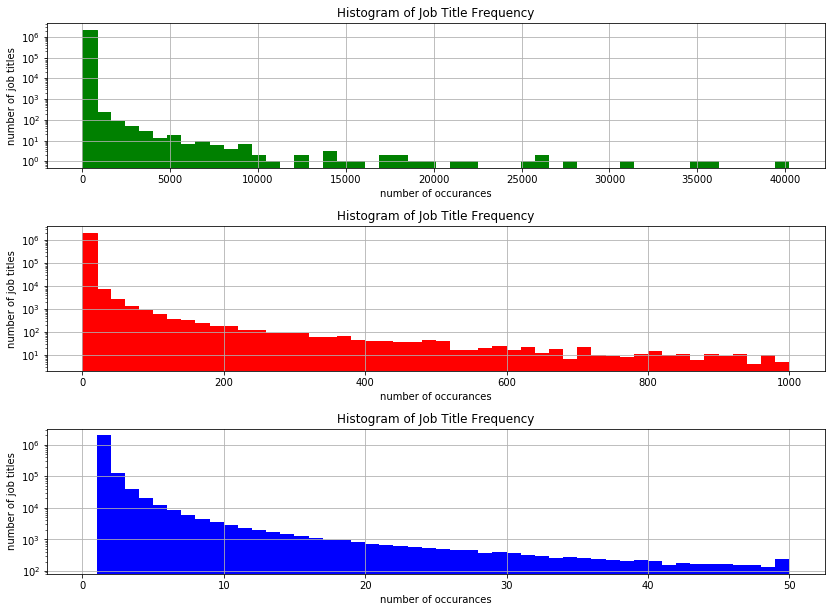

In [11]:
counts = []
for each in title_freq:
    counts.append(each[1])
    
fig = plt.figure(1, figsize=(12, 9))

plt.subplot(311)
n, bins, patches = plt.hist(counts, 50, facecolor='g', log=True)
plt.xlabel('number of occurances')
plt.ylabel('number of job titles')
plt.title('Histogram of Job Title Frequency')
plt.grid(True)
patches[0].set_color('g')

plt.subplot(312)
n, bins, patches = plt.hist(counts, 50, facecolor='r', log=True, range=(0,1000))
plt.xlabel('number of occurances')
plt.ylabel('number of job titles')
plt.title('Histogram of Job Title Frequency')
plt.grid(True)
patches[0].set_color('r')



plt.subplot(313)
n, bins, patches = plt.hist(counts, 50, facecolor='b', log=True, range=(0,50))
plt.xlabel('number of occurances')
plt.ylabel('number of job titles')
plt.title('Histogram of Job Title Frequency')
plt.grid(True)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()